In [29]:
import pandas as pd 
import yfinance as yf 
import mplfinance as mpf
import ta

import warnings 
warnings.filterwarnings('ignore')

In [2]:
nifty = yf.Ticker("^NSEI").history('5y')    

In [3]:
print(nifty)

                                   Open          High           Low  \
Date                                                                  
2020-01-29 00:00:00+05:30  12114.900391  12169.599609  12103.799805   
2020-01-30 00:00:00+05:30  12147.750000  12150.299805  12010.599609   
2020-01-31 00:00:00+05:30  12100.400391  12103.549805  11945.849609   
2020-02-03 00:00:00+05:30  11627.450195  11749.849609  11614.500000   
2020-02-04 00:00:00+05:30  11786.250000  11986.150391  11783.400391   
...                                 ...           ...           ...   
2025-01-23 00:00:00+05:30  23128.300781  23270.800781  23090.650391   
2025-01-24 00:00:00+05:30  23183.900391  23347.300781  23050.000000   
2025-01-27 00:00:00+05:30  22940.150391  23007.449219  22786.900391   
2025-01-28 00:00:00+05:30  22960.449219  23137.949219  22857.650391   
2025-01-29 00:00:00+05:30  23026.750000  23125.849609  22976.500000   

                                  Close  Volume  Dividends  Stock Splits  
D

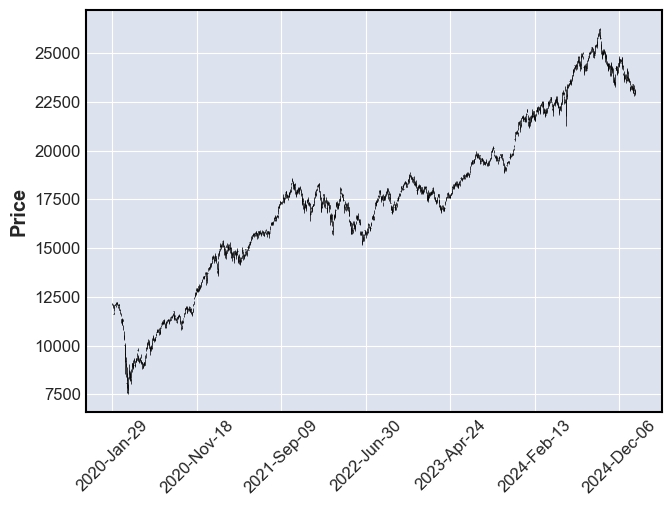

In [4]:
mpf.plot(nifty)

In [6]:
nifty.to_csv('nifty_5yrs_data')
data = pd.read_csv('nifty_5yrs_data')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1238 non-null   object 
 1   Open          1238 non-null   float64
 2   High          1238 non-null   float64
 3   Low           1238 non-null   float64
 4   Close         1238 non-null   float64
 5   Volume        1238 non-null   int64  
 6   Dividends     1238 non-null   float64
 7   Stock Splits  1238 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.5+ KB


In [7]:
data.Date= pd.to_datetime(data.Date)
data = data.set_index('Date')

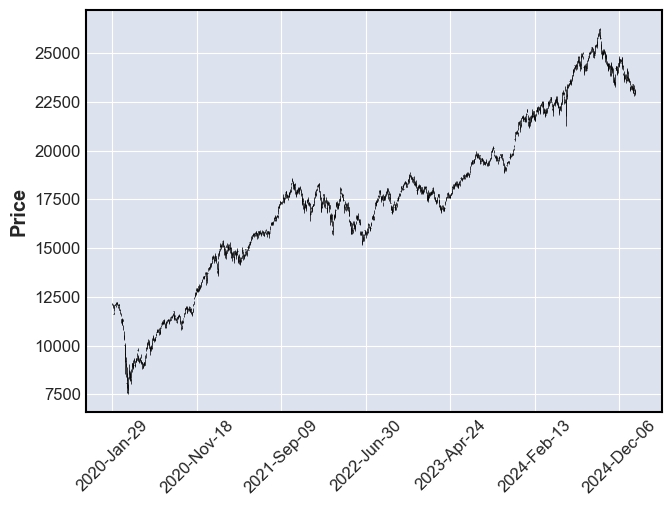

In [8]:
mpf.plot(data)

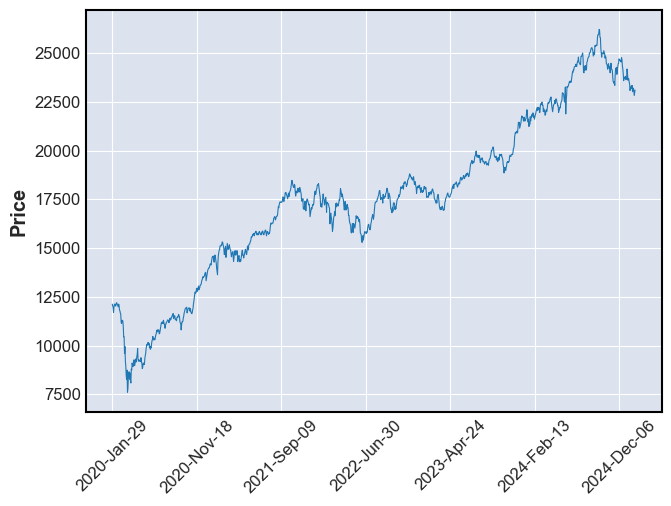

In [11]:
mpf.plot(data,type = 'line')

In [19]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [20]:
data.index = pd.to_datetime(data.index)
data_2020 = data.loc['2020']


In [22]:
print(data.index)
print(type(data.index))


DatetimeIndex(['2020-01-29 00:00:00+05:30', '2020-01-30 00:00:00+05:30',
               '2020-01-31 00:00:00+05:30', '2020-02-03 00:00:00+05:30',
               '2020-02-04 00:00:00+05:30', '2020-02-05 00:00:00+05:30',
               '2020-02-06 00:00:00+05:30', '2020-02-07 00:00:00+05:30',
               '2020-02-10 00:00:00+05:30', '2020-02-11 00:00:00+05:30',
               ...
               '2025-01-16 00:00:00+05:30', '2025-01-17 00:00:00+05:30',
               '2025-01-20 00:00:00+05:30', '2025-01-21 00:00:00+05:30',
               '2025-01-22 00:00:00+05:30', '2025-01-23 00:00:00+05:30',
               '2025-01-24 00:00:00+05:30', '2025-01-27 00:00:00+05:30',
               '2025-01-28 00:00:00+05:30', '2025-01-29 00:00:00+05:30'],
              dtype='datetime64[ns, UTC+05:30]', name='Date', length=1238, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


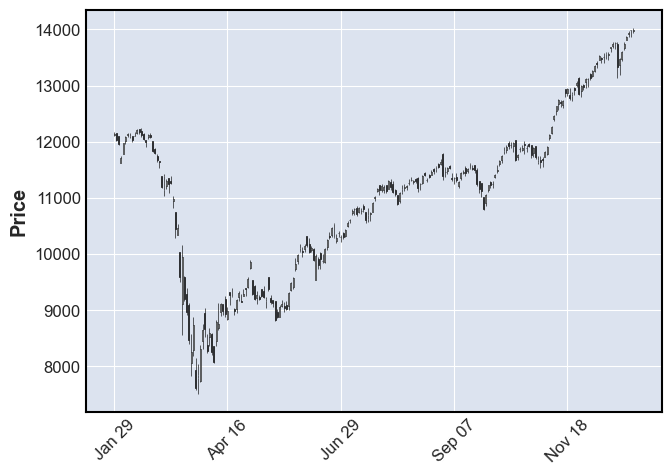

In [23]:
data_2020 = data.loc['2020']
mpf.plot(data_2020, type='candle')


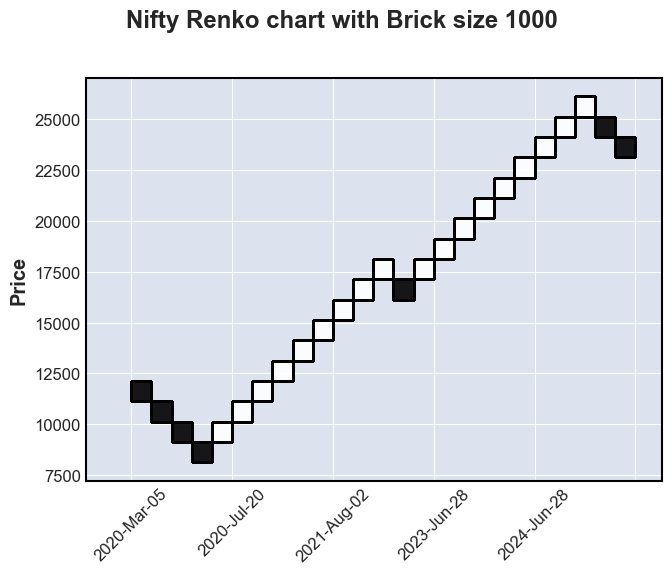

In [27]:
mpf.plot(data , type='renko', renko_params={'brick_size': 1000},title="Nifty Renko chart with Brick size 1000")

ATR (Average True Range) is a technical indicator that measures market volatility. It calculates the average movement of an asset over a specific period, helping traders determine price fluctuations and set appropriate stop-loss and Renko brick sizes.

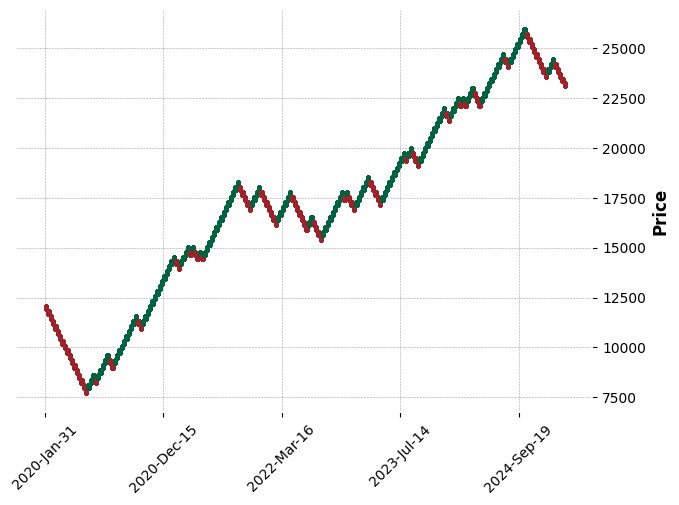

In [28]:


mpf.plot(data, type='renko', renko_params={'brick_size': 'atr', 'atr_length': 14}, style='charles')


In [30]:
data['ATR'] = ta.volatility.AverageTrueRange(high=data['High'], 
                                             low=data['Low'], 
                                             close=data['Close'], 
                                             window=14).average_true_range()


brick_size = data['ATR'].iloc[-1]
print(f"Selected Brick Size (ATR): {brick_size:.2f}")

Selected Brick Size (ATR): 261.90


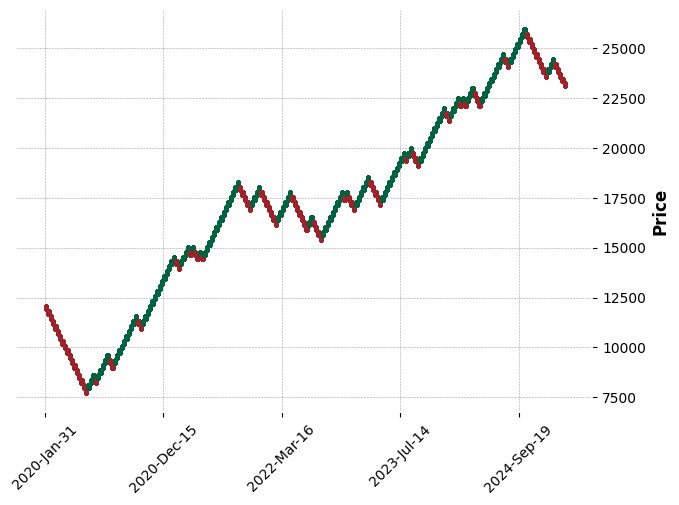

In [33]:
mpf.plot(data, type='renko', renko_params={'brick_size': 'atr', 'atr_length': 14}, style="charles")